# ***Project Time Series with***

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Read Dataset**

In [39]:
file_path = "NO2_in_Lenteng(2 tahun).csv"

## **Data Understanding**

In [40]:
df = pd.read_csv(file_path)

print(df.head(10))

            t          x         y  crs       NO2
0  2023-10-19  113.77659 -7.020542  b''  0.000005
1  2023-10-19  113.77659 -7.055264  b''  0.000017
2  2023-10-20  113.77659 -7.020542  b''  0.000008
3  2023-10-20  113.77659 -7.055264  b''  0.000018
4  2023-10-21  113.77659 -7.020542  b''  0.000012
5  2023-10-21  113.77659 -7.055264  b''  0.000012
6  2023-10-22  113.77659 -7.020542  b''  0.000023
7  2023-10-22  113.77659 -7.055264  b''  0.000026
8  2023-10-23  113.77659 -7.020542  b''  0.000017
9  2023-10-23  113.77659 -7.055264  b''  0.000013


In [41]:
print('Informasi Dasar Dataset')
print(df.info)

Informasi Dasar Dataset
<bound method DataFrame.info of                t          x         y  crs           NO2
0     2023-10-19  113.77659 -7.020542  b''  5.481532e-06
1     2023-10-19  113.77659 -7.055264  b''  1.739039e-05
2     2023-10-20  113.77659 -7.020542  b''  7.618822e-06
3     2023-10-20  113.77659 -7.055264  b''  1.763296e-05
4     2023-10-21  113.77659 -7.020542  b''  1.180687e-05
...          ...        ...       ...  ...           ...
1445  2025-10-16  113.77659 -7.055264  b''  1.462123e-05
1446  2025-10-17  113.77659 -7.020542  b'' -3.795632e-07
1447  2025-10-17  113.77659 -7.055264  b''  1.804137e-05
1448  2025-10-18  113.77659 -7.020542  b''  1.320828e-05
1449  2025-10-18  113.77659 -7.055264  b''  9.687136e-06

[1450 rows x 5 columns]>


In [42]:
print('Statistik Deskriptif')
print(df.describe())
print()

print('Jumlah Missing Value')
print(df.isnull().sum())


Statistik Deskriptif
                  x            y         NO2
count  1.450000e+03  1450.000000  697.000000
mean   1.137766e+02    -7.037903    0.000012
std    1.421576e-14     0.017367    0.000009
min    1.137766e+02    -7.055264   -0.000021
25%    1.137766e+02    -7.055264    0.000006
50%    1.137766e+02    -7.037903    0.000012
75%    1.137766e+02    -7.020542    0.000018
max    1.137766e+02    -7.020542    0.000042

Jumlah Missing Value
t        0
x        0
y        0
crs      0
NO2    753
dtype: int64


C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_6636\22787649.py:15: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
d:\Perkuliahan\Semester 5\Poyek Sains Data\PSD\venv_py3.11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


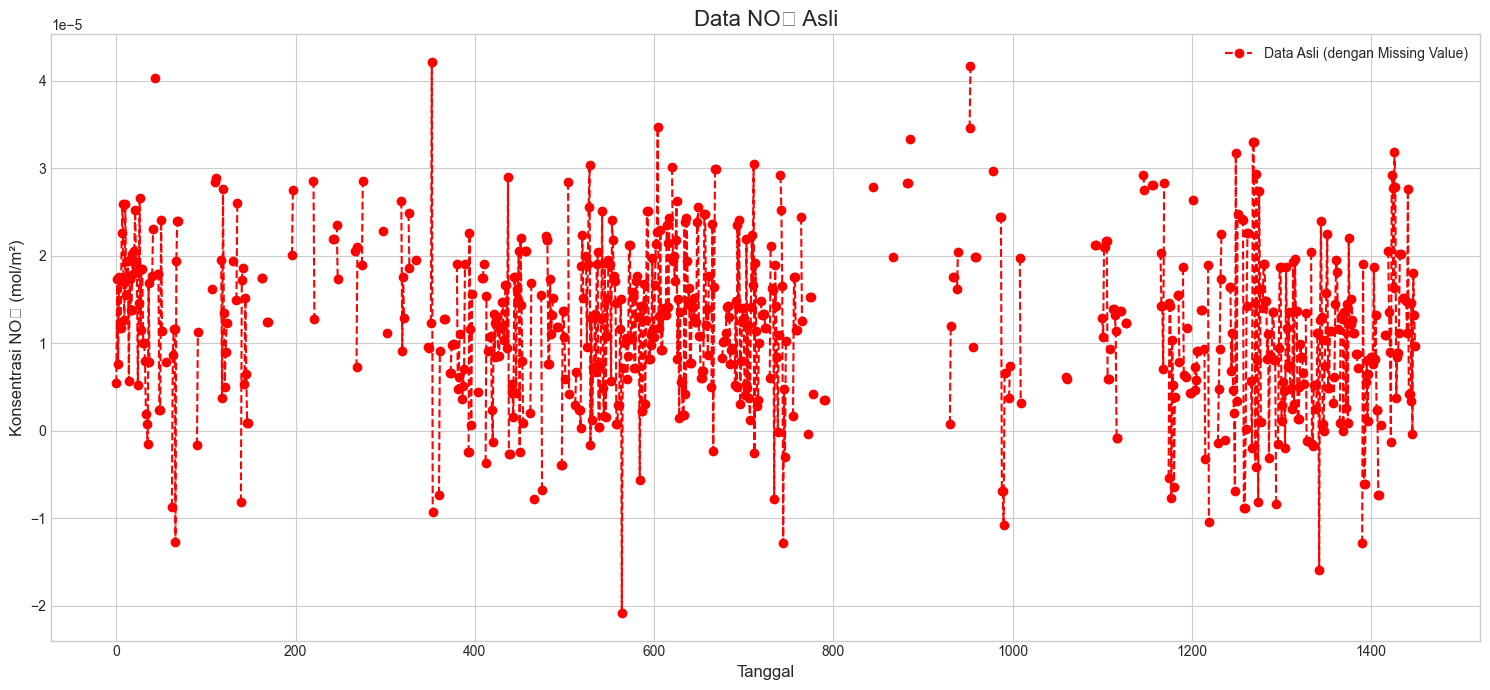

In [43]:
# 3. VISUALISASI HASIL
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid') # Mengatur style grafik agar lebih bagus
plt.figure(figsize=(15, 7)) # Mengatur ukuran gambar

# Plot data asli (akan terlihat putus-putus di bagian yang kosong)
plt.plot(df.index, df['NO2'], 
         marker='o', linestyle='--', color='red', label='Data Asli (dengan Missing Value)')

# Memberi judul dan label
plt.title('Data NO₂ Asli', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsentrasi NO₂ (mol/m²)', fontsize=12)
plt.legend()
plt.tight_layout()

# Menampilkan grafik
plt.show()

## **Data Preprocessing**

In [44]:
# Mengubah Kolom date
df['t'] = pd.to_datetime(df['t'])

# Menghapus Kolom tidak berguna
df_cleaned = df.drop(columns=['x', 'y', 'crs'])

In [45]:
print(df_cleaned)

              t           NO2
0    2023-10-19  5.481532e-06
1    2023-10-19  1.739039e-05
2    2023-10-20  7.618822e-06
3    2023-10-20  1.763296e-05
4    2023-10-21  1.180687e-05
...         ...           ...
1445 2025-10-16  1.462123e-05
1446 2025-10-17 -3.795632e-07
1447 2025-10-17  1.804137e-05
1448 2025-10-18  1.320828e-05
1449 2025-10-18  9.687136e-06

[1450 rows x 2 columns]


In [46]:
# Koreksi nilai negatif menjadi NaN (agar dianggap sebagai data hilang)
df_cleaned.loc[df_cleaned['NO2'] < 0, 'NO2'] = np.nan
print("Jumlah missing value setelah nilai negatif diubah menjadi NaN:")
print(df_cleaned.isnull().sum())

Jumlah missing value setelah nilai negatif diubah menjadi NaN:
t        0
NO2    817
dtype: int64


### *Interpolasi Missing Value*

In [47]:
# Jadikan kolom waktu ('t') sebagai index.
df_cleaned.set_index('t', inplace=True)

# Lakukan interpolasi dengan metode 'time'
df_interpolated = df_cleaned.interpolate(method='time')

# Kembalikan index 't' menjadi kolom biasa jika diperlukan nanti
df_interpolated.reset_index(inplace=True)

In [48]:
print('Jumlah Missing Value setelah interpolasi')
print(df_interpolated.isnull().sum())

print(df_interpolated.head())

Jumlah Missing Value setelah interpolasi
t      0
NO2    0
dtype: int64
           t       NO2
0 2023-10-19  0.000005
1 2023-10-19  0.000017
2 2023-10-20  0.000008
3 2023-10-20  0.000018
4 2023-10-21  0.000012


C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_6636\2466481591.py:19: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
d:\Perkuliahan\Semester 5\Poyek Sains Data\PSD\venv_py3.11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


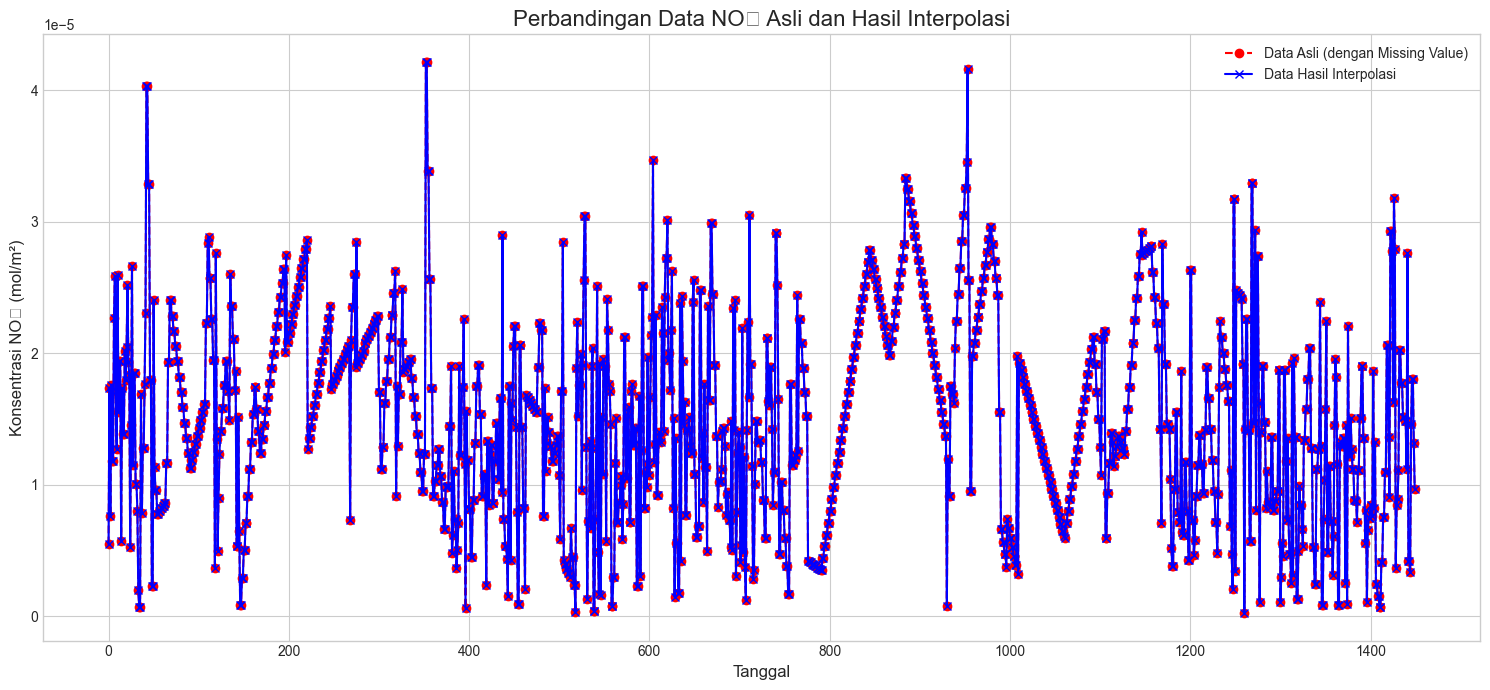

In [49]:
# 3. VISUALISASI HASIL
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid') # Mengatur style grafik agar lebih bagus
plt.figure(figsize=(15, 7)) # Mengatur ukuran gambar

# Plot data asli (akan terlihat putus-putus di bagian yang kosong)
plt.plot(df_interpolated.index, df_interpolated['NO2'], 
         marker='o', linestyle='--', color='red', label='Data Asli (dengan Missing Value)')

# Plot data yang sudah diinterpolasi (garisnya akan menyambung)
plt.plot(df_interpolated.index, df_interpolated['NO2'], 
         marker='x', linestyle='-', color='blue', label='Data Hasil Interpolasi')

# Memberi judul dan label
plt.title('Perbandingan Data NO₂ Asli dan Hasil Interpolasi', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsentrasi NO₂ (mol/m²)', fontsize=12)
plt.legend()
plt.tight_layout()

# Menampilkan grafik
plt.show()

### *Memproses Data Outliers*

#### Sebelum Memproses Outliers

In [50]:
print("## 1. Menganalisis Outlier dengan Metode IQR ##")

# Ambil kolom target untuk dianalisis
kolom_target = 'NO2'
data_kolom = df_interpolated[kolom_target]

# Hitung Q1, Q3, dan IQR
Q1 = data_kolom.quantile(0.25)
Q3 = data_kolom.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah (Lower Bound): {lower_bound}")
print(f"Batas Atas (Upper Bound): {upper_bound}")
print(f"IQR: {IQR}\n")

## 1. Menganalisis Outlier dengan Metode IQR ##
Batas Bawah (Lower Bound): -7.061156345833329e-06
Batas Atas (Upper Bound): 3.724596624305555e-05
IQR: 1.107678064722222e-05



🔍 Ditemukan 5 outlier:
             t       NO2
42  2023-11-09  0.000040
43  2023-11-09  0.000040
352 2024-04-16  0.000042
353 2024-04-16  0.000042
953 2025-02-12  0.000042
----------------------------------------

## 2. Visualisasi dengan Box Plot ##


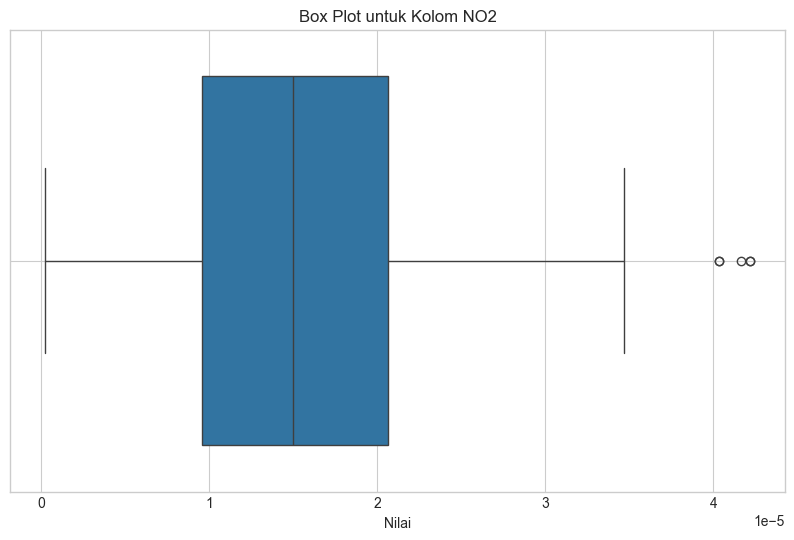

In [51]:
# Cari data yang berada di luar batas (outlier)
outliers = df_interpolated[(data_kolom < lower_bound) | (data_kolom > upper_bound)]

if not outliers.empty:
    print(f"🔍 Ditemukan {len(outliers)} outlier:")
    print(outliers)
else:
    print("✅ Tidak ditemukan outlier pada kolom NO2.")

print("-" * 40)

# --- 2. VISUALISASI OUTLIER DENGAN BOX PLOT ---

print("\n## 2. Visualisasi dengan Box Plot ##")
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_kolom)
plt.title(f'Box Plot untuk Kolom {kolom_target}')
plt.xlabel('Nilai')
plt.grid(True)
plt.show()

In [52]:
df_capped = df_interpolated.copy()

In [53]:
df_capped[kolom_target] = np.clip(df_capped[kolom_target], lower_bound, upper_bound)

print("✅ Proses capping selesai.")
print("-" * 40)

# --- 3. VERIFIKASI ---

print("\n## Verifikasi Setelah Capping ##")
print("Statistik deskriptif kolom NO2 setelah di-capping:")
print(df_capped[kolom_target].describe())

# Memeriksa kembali salah satu outlier asli
print("\nContoh Perubahan Data Outlier (index 42):")
print(f"Nilai Asli:   {df_interpolated.loc[42, kolom_target]}")
print(f"Nilai Baru:   {df_capped.loc[42, kolom_target]}")

✅ Proses capping selesai.
----------------------------------------

## Verifikasi Setelah Capping ##
Statistik deskriptif kolom NO2 setelah di-capping:
count    1.450000e+03
mean     1.535476e-05
std      7.509187e-06
min      2.543488e-07
25%      9.554015e-06
50%      1.497787e-05
75%      2.063080e-05
max      3.724597e-05
Name: NO2, dtype: float64

Contoh Perubahan Data Outlier (index 42):
Nilai Asli:   4.0356037e-05
Nilai Baru:   3.724596624305555e-05


#### Setelah Memproses Outlier

In [54]:
print("## 1. Menganalisis Outlier dengan Metode IQR ##")

# Ambil kolom target untuk dianalisis
kolom_target = 'NO2'
data_kolom = df_capped[kolom_target]

# Hitung Q1, Q3, dan IQR
Q1 = data_kolom.quantile(0.25)
Q3 = data_kolom.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah (Lower Bound): {lower_bound}")
print(f"Batas Atas (Upper Bound): {upper_bound}")
print(f"IQR: {IQR}\n")

## 1. Menganalisis Outlier dengan Metode IQR ##
Batas Bawah (Lower Bound): -7.061156345833329e-06
Batas Atas (Upper Bound): 3.724596624305555e-05
IQR: 1.107678064722222e-05



In [76]:
# Cari data yang berada di luar batas (outlier)
outliers = df_capped[(data_kolom < lower_bound) | (data_kolom > upper_bound)]

if not outliers.empty:
    print(f"🔍 Ditemukan {len(outliers)} outlier:")
    print(outliers)
else:
    print("✅ Tidak ditemukan outlier pada kolom NO2.")

✅ Tidak ditemukan outlier pada kolom NO2.


### *Konversi Timeseries ke Supervised*

In [56]:
# --- FUNGSI UNTUK KONVERSI TIME SERIES KE SUPERVISED ---
def series_to_supervised(data, n_in=30, n_out=1, dropnan=True):
    """
    Mengubah series waktu menjadi dataset supervised.
    Arguments:
        data: DataFrame atau Series input.
        n_in: Jumlah observasi lampau (X).
        n_out: Jumlah observasi masa depan (y).
        dropnan: Boolean apakah akan menghapus baris dengan nilai NaN.
    Returns:
        Pandas DataFrame yang sudah diformat untuk supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names.append(f't-{i}')
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names.append('target')
        else:
            names.append(f't+{i}')
    # Gabungkan semua
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop baris dengan nilai NaN
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [57]:
data_no2 = df_capped[['NO2']]

# Ubah menjadi format supervised dengan 30 hari ke belakang sebagai input
n_lags = 30
df_supervised = series_to_supervised(data_no2, n_in=n_lags)


# --- TAMPILKAN HASILNYA ---
print(f"✅ Konversi ke dataset supervised berhasil.")
print(f"Dimensi data baru: {df_supervised.shape}")
print("\n5 baris pertama dari dataset supervised:")
print(df_supervised.head())

✅ Konversi ke dataset supervised berhasil.
Dimensi data baru: (1420, 31)

5 baris pertama dari dataset supervised:
        t-30      t-29      t-28      t-27      t-26      t-25      t-24  \
30  0.000005  0.000017  0.000008  0.000018  0.000012  0.000012  0.000023   
31  0.000017  0.000008  0.000018  0.000012  0.000012  0.000023  0.000026   
32  0.000008  0.000018  0.000012  0.000012  0.000023  0.000026  0.000017   
33  0.000018  0.000012  0.000012  0.000023  0.000026  0.000017  0.000013   
34  0.000012  0.000012  0.000023  0.000026  0.000017  0.000013  0.000026   

        t-23      t-22      t-21  ...       t-9       t-8       t-7       t-6  \
30  0.000026  0.000017  0.000013  ...  0.000025  0.000019  0.000018  0.000005   
31  0.000017  0.000013  0.000026  ...  0.000019  0.000018  0.000005  0.000015   
32  0.000013  0.000026  0.000016  ...  0.000018  0.000005  0.000015  0.000027   
33  0.000026  0.000016  0.000019  ...  0.000005  0.000015  0.000027  0.000011   
34  0.000016  0.000019 

### *Seleksei Fitur dengan Menggunakan Autocorrelation*

#### Membuat Score Autocorrelation

In [58]:
corr_matrix = df_supervised.corr()

# --- 2. Fokus pada Korelasi dengan Kolom 'target' ---
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)

print("## Korelasi Setiap Fitur Lag terhadap 'target' ##")
print(target_corr)
print("-" * 50)

## Korelasi Setiap Fitur Lag terhadap 'target' ##
t-1     0.716344
t-2     0.599494
t-3     0.519994
t-4     0.460369
t-5     0.425198
t-6     0.400362
t-7     0.368422
t-8     0.340096
t-9     0.308701
t-10    0.287869
t-11    0.263851
t-12    0.248537
t-13    0.244163
t-14    0.232686
t-15    0.222765
t-16    0.222144
t-17    0.208154
t-23    0.199605
t-19    0.199357
t-27    0.199320
t-26    0.198679
t-24    0.198330
t-20    0.192717
t-22    0.191882
t-21    0.191090
t-25    0.188442
t-18    0.188319
t-30    0.166325
t-29    0.162485
t-28    0.162372
Name: target, dtype: float64
--------------------------------------------------


C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_6636\2271241154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')


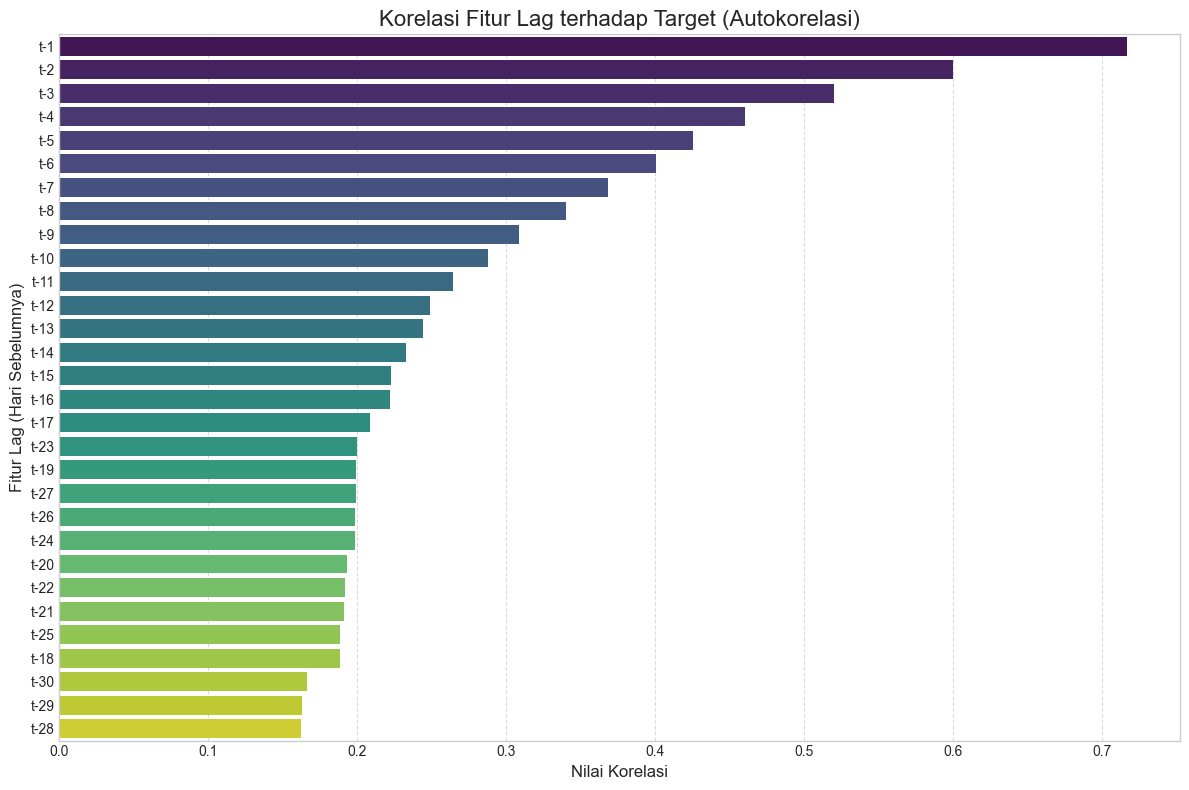

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')

plt.title('Korelasi Fitur Lag terhadap Target (Autokorelasi)', fontsize=16)
plt.xlabel('Nilai Korelasi', fontsize=12)
plt.ylabel('Fitur Lag (Hari Sebelumnya)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Memilih Feature yang memiliki nilai > 0.5

In [60]:
# Tentukan Ambang Batas
threshold = 0.5

# Filter Series korelasi
highly_correlated_features = target_corr[target_corr > threshold]


selected_columns = highly_correlated_features.index.tolist()

In [61]:
# --- 4. Tampilkan Hasilnya untuk Verifikasi ---
print(f"✅ Seleksi fitur dengan ambang batas korelasi > {threshold} selesai.")
print("-" * 50)

print(f"Jumlah fitur asli: {len(df_supervised.columns) - 1}")
print(f"Jumlah fitur yang terpilih: {len(selected_columns)}")
print("\nNama-nama fitur yang terpilih:")
print(selected_columns)

✅ Seleksi fitur dengan ambang batas korelasi > 0.5 selesai.
--------------------------------------------------
Jumlah fitur asli: 30
Jumlah fitur yang terpilih: 3

Nama-nama fitur yang terpilih:
['t-1', 't-2', 't-3']


### *Membagi Dataset Menjadi Data Train dan Data Test*

In [62]:
# --- 1. Pisahkan antara Fitur (X) dan Target (y) ---
X = df_supervised[selected_columns]
y = df_supervised['target']

# --- 2. Tentukan Titik Pembagian (80% dari total data) ---
n_rows = len(df_supervised)
split_point = int(n_rows * 0.8)

# --- 3. Lakukan Pembagian Data secara Kronologis ---
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]


# --- 4. Tampilkan Hasil Pembagian ---
print("✅ Pembagian data selesai.")
print("-" * 40)
print(f"Jumlah total baris data: {n_rows}")
print(f"Titik pembagian (indeks): {split_point}\n")

print("Dimensi Data Latih (Training):")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}\n")

print("Dimensi Data Uji (Testing):")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

✅ Pembagian data selesai.
----------------------------------------
Jumlah total baris data: 1420
Titik pembagian (indeks): 1136

Dimensi Data Latih (Training):
X_train: (1136, 3)
y_train: (1136,)

Dimensi Data Uji (Testing):
X_test: (284, 3)
y_test: (284,)


In [63]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# --- 2. Fit Scaler HANYA pada Data Latih (Training Data) ---
# Scaler belajar rentang min-max dari data training
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# --- 3. Gunakan Scaler yang SAMA untuk Transformasi Data Uji ---
# Scaler menerapkan aturan yang sama dari data training ke data testing
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


# --- 4. Tampilkan Hasil ---
print("✅ Normalisasi Min-Max selesai.")
print("-" * 40)
print(f"Dimensi X_train setelah di-scaling: {X_train_scaled.shape}")
print(f"Dimensi X_test setelah di-scaling: {X_test_scaled.shape}\n")

# Tampilkan contoh data untuk verifikasi
print("Contoh 5 baris pertama dari X_train yang sudah dinormalisasi:")
print(X_train_scaled[:5])
print("\nNilai min dari data yang sudah dinormalisasi:", np.min(X_train_scaled))
print("Nilai max dari data yang sudah dinormalisasi:", np.max(X_train_scaled))

✅ Normalisasi Min-Max selesai.
----------------------------------------
Dimensi X_train setelah di-scaling: (1136, 3)
Dimensi X_test setelah di-scaling: (284, 3)

Contoh 5 baris pertama dari X_train yang sudah dinormalisasi:
[[0.49210435 0.49210435 0.30193381]
 [0.26425078 0.49210435 0.49210435]
 [0.26425078 0.26425078 0.49210435]
 [0.20854387 0.26425078 0.26425078]
 [0.0440133  0.20854387 0.26425078]]

Nilai min dari data yang sudah dinormalisasi: 0.0
Nilai max dari data yang sudah dinormalisasi: 1.0


## **Modeling**

In [84]:
# Inisialisasi dan Latih Model KNN

value_knn = 29

# Inisialisasi Model KNN
knn_model = KNeighborsRegressor(n_neighbors=value_knn)

# Latih model menggunakan data training
knn_model.fit(X_train_scaled, y_train_scaled.ravel())

print("✅ Model KNN berhasil dilatih.")

✅ Model KNN berhasil dilatih.


In [85]:
# Lakukan Prediksi pada Data Uji

# Model akan memprediksi nilai y berdasarkan X_test_scaled
y_pred_scaled = knn_model.predict(X_test_scaled)

print("✅ Prediksi pada data uji selesai.")

✅ Prediksi pada data uji selesai.


In [86]:
# Denormalisasi Hasil Prediksi

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Kita juga denormalisasi y_test untuk perbandingan yang adil
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

print("✅ Denormalisasi hasil prediksi selesai.")

✅ Denormalisasi hasil prediksi selesai.


In [87]:
# Tampilkan dan Bandingkan Hasil

# Buat DataFrame untuk membandingkan nilai aktual dengan prediksi
comparison_df = pd.DataFrame({
    'Nilai Aktual': y_test_actual.flatten(),
    'Hasil Prediksi KNN': y_pred.flatten()
})

print("## Perbandingan Nilai Aktual vs Hasil Prediksi ##")
print(comparison_df.head(10)) # Menampilkan 10 hasil pertama

## Perbandingan Nilai Aktual vs Hasil Prediksi ##
   Nilai Aktual  Hasil Prediksi KNN
0      0.000014            0.000019
1      0.000014            0.000015
2      0.000007            0.000014
3      0.000028            0.000011
4      0.000024            0.000019
5      0.000024            0.000019
6      0.000019            0.000023
7      0.000019            0.000020
8      0.000015            0.000017
9      0.000015            0.000015


## **Evaluasi Model**

In [88]:
# Hitung Metrik Evaluasi

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_pred)

# R-squared (R2)
r2 = r2_score(y_test_actual, y_pred)

# Mean Absolute Percentage Error (MAPE)
# Kita tambahkan nilai kecil (epsilon) untuk menghindari pembagian dengan nol jika ada nilai aktual 0
epsilon = 1e-10
mape = np.mean(np.abs((y_test_actual - y_pred) / (y_test_actual + epsilon))) * 100

# Mean Relative Error (MRE)
mre = np.mean((y_test_actual - y_pred) / (y_test_actual + epsilon)) * 100


# --- 2. Tampilkan Hasil Evaluasi ---
print("## Hasil Evaluasi Kinerja Model KNN ##")
print("-" * 40)
print(f"Mean Squared Error (MSE): {mse:.10f}")
print(f"R-squared (R2 Score):     {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Relative Error (MRE): {mre:.2f}%")

## Hasil Evaluasi Kinerja Model KNN ##
----------------------------------------
Mean Squared Error (MSE): 0.0000000000
R-squared (R2 Score):     0.1459
Mean Absolute Percentage Error (MAPE): 118.92%
Mean Relative Error (MRE): -96.96%


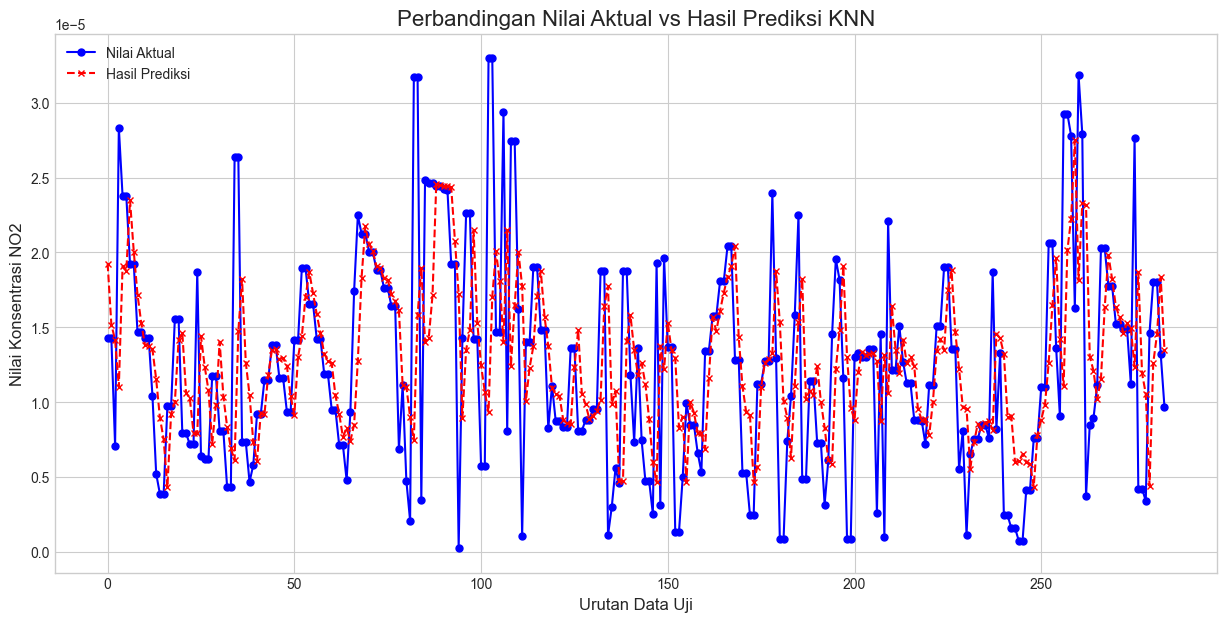

In [89]:
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Nilai Aktual', color='blue', marker='o', markersize=5, linestyle='-')
plt.plot(y_pred, label='Hasil Prediksi', color='red', marker='x', markersize=5, linestyle='--')
plt.title('Perbandingan Nilai Aktual vs Hasil Prediksi KNN', fontsize=16)
plt.xlabel('Urutan Data Uji', fontsize=12)
plt.ylabel('Nilai Konsentrasi NO2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [82]:
k_values = range(1, 31, 2) 

# Siapkan list kosong untuk menyimpan hasil skor
r2_scores = []
best_k = 0
best_r2_score = -np.inf # Mulai dari nilai minus tak hingga

print("Memulai pencarian nilai k optimal...")

# --- 2. Lakukan Looping dan Evaluasi ---

for k in k_values:
    # Buat model KNN baru dengan nilai k saat ini
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Latih model
    knn_model.fit(X_train_scaled, y_train_scaled.ravel())
    
    # Lakukan prediksi
    y_pred_scaled = knn_model.predict(X_test_scaled)
    
    # PENTING: Denormalisasi hasil sebelum evaluasi
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_actual = scaler_y.inverse_transform(y_test_scaled)
    
    # Hitung skor R2 dan simpan hasilnya
    current_r2 = r2_score(y_test_actual, y_pred)
    r2_scores.append(current_r2)
    
    # Periksa apakah skor saat ini adalah yang terbaik
    if current_r2 > best_r2_score:
        best_r2_score = current_r2
        best_k = k

print("Pencarian selesai.")
print("-" * 40)

# --- 3. Tampilkan Hasil Terbaik ---
print(f"✅ Nilai 'k' paling optimal ditemukan: {best_k}")
print(f"   Dengan Skor R-squared (R2) terbaik: {best_r2_score:.4f}")

Memulai pencarian nilai k optimal...
Pencarian selesai.
----------------------------------------
✅ Nilai 'k' paling optimal ditemukan: 29
   Dengan Skor R-squared (R2) terbaik: 0.1459


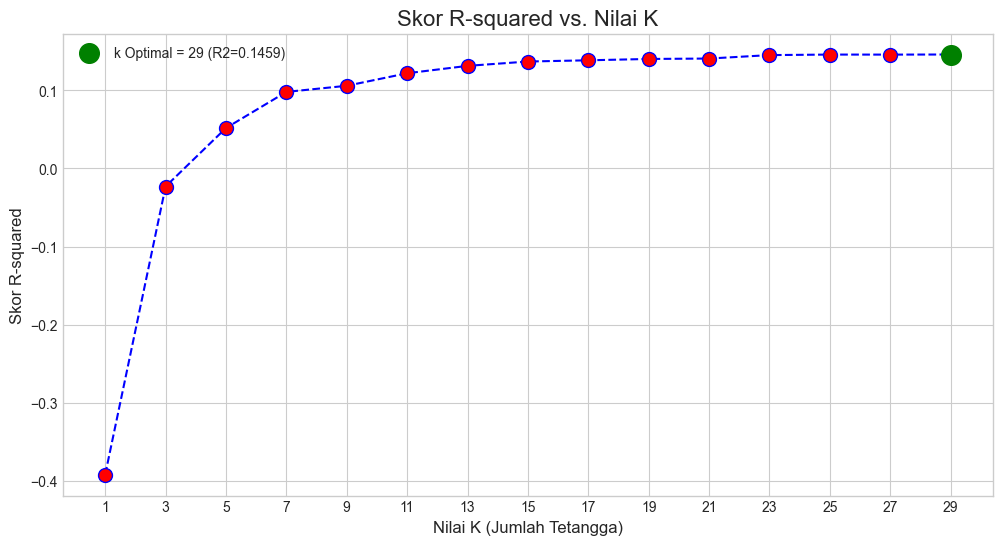

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, r2_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
         
# Tandai titik terbaik
plt.scatter(best_k, best_r2_score, color='green', s=200, label=f'k Optimal = {best_k} (R2={best_r2_score:.4f})', zorder=5)

plt.title('Skor R-squared vs. Nilai K', fontsize=16)
plt.xlabel('Nilai K (Jumlah Tetangga)', fontsize=12)
plt.ylabel('Skor R-squared', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()